# Exercise 4 - Solutions

Import all necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Import the climate data files using pandas:

In [2]:
garmisch  = pd.read_csv("data/produkt_klima_tag_20171010_20190412_01550.txt",sep=";",parse_dates=["MESS_DATUM"],index_col="MESS_DATUM")
zugspitze = pd.read_csv("data/produkt_klima_tag_20171010_20190412_05792.txt",sep=";",parse_dates=["MESS_DATUM"],index_col="MESS_DATUM")

Clip the data to the year 2018:

In [3]:
garmisch  = garmisch["2018"]
zugspitze = zugspitze["2018"]

Resample temperature values to monthly averages:

In [8]:
garmisch_agg  = garmisch[[" TMK", " RSK"]].resample('1m').agg({" TMK": "mean", " RSK": "sum"})
zugspitze_agg = zugspitze[[" TMK", " RSK"]].resample('1m').agg({" TMK": "mean", " RSK": "sum"})

,TMK,RSK
MESS_DATUM,,
2018-01-31,0.806452,220.4
2018-02-28,-3.353571,55.2
2018-03-31,2.132258,50.4
2018-04-30,12.393333,34.0
2018-05-31,14.138710,114.8
2018-06-30,16.263333,152.4
2018-07-31,18.038710,99.0
2018-08-31,18.738710,199.9
2018-09-30,14.163333,118.9


Create the plotting function:

In [45]:
def create_climate_diagram(df, temp_col, prec_col, title, filename, temp_min=-15, temp_max=20, prec_min=0, prec_max=370):
    """
    Draw a climate diagram.
    
    Parameters
    ----------
    df : pd.DataFrame
        Dataframe with values to plot from
    temp_col : str
        Name of temperature column
    prec_col : str
        Name of precipitation column
    title : String
        The title for the figure
    filename : String
        The name of the output figure
    temp_min : Number
        The minimum temperature value to display
    temp_max : Number
        The maximum temperature value to display
    prec_min : Number
        The minimum precipitation value to display
    prec_max : Number
        The maximum precipitation value to display

    Returns
    -------
    The figure
    
    """
    
    fig = plt.figure(figsize=(10,8))
    plt.rcParams["font.size"] = 16

    ax2 = fig.add_subplot(111)
    ax1 = ax2.twinx()

    ax2.bar(df.index.strftime("%b"), df.loc[:, prec_col].values, width=0.8, color="b")
    ax1.plot(df.loc[:, temp_col].values, c="r")

    ax2.set_ylabel("Precipitation (mm)")
    ax1.set_ylabel("Temperature (°C)")

    ax1.set_ylim((temp_min,temp_max))
    ax2.set_ylim((prec_min,prec_max))
    
    plt.title(title)
    plt.savefig(filename)
    plt.show()
    
    return fig

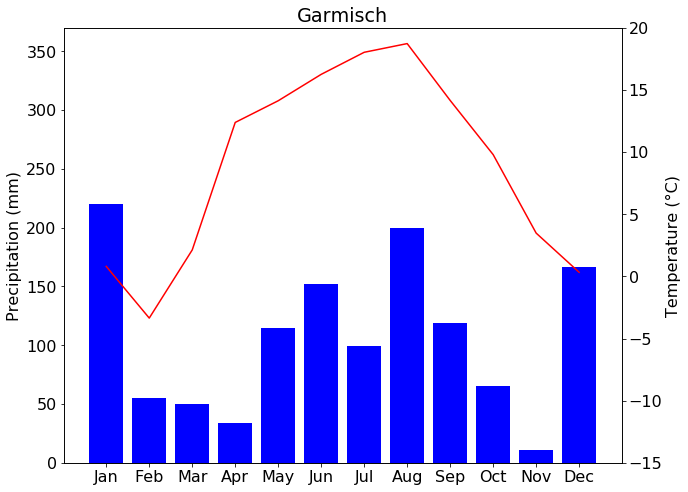

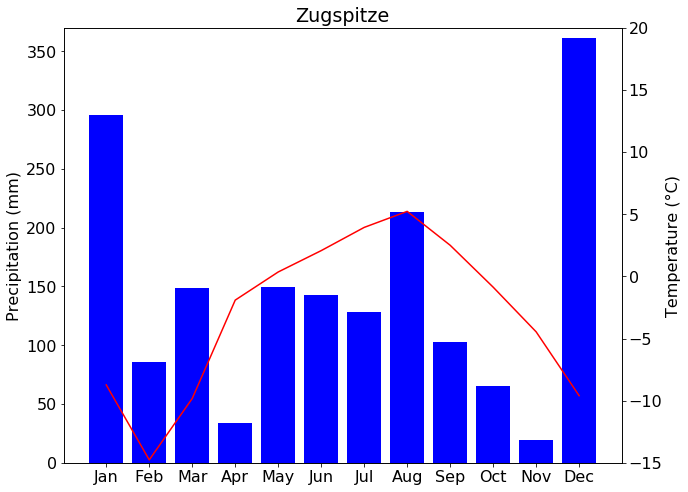

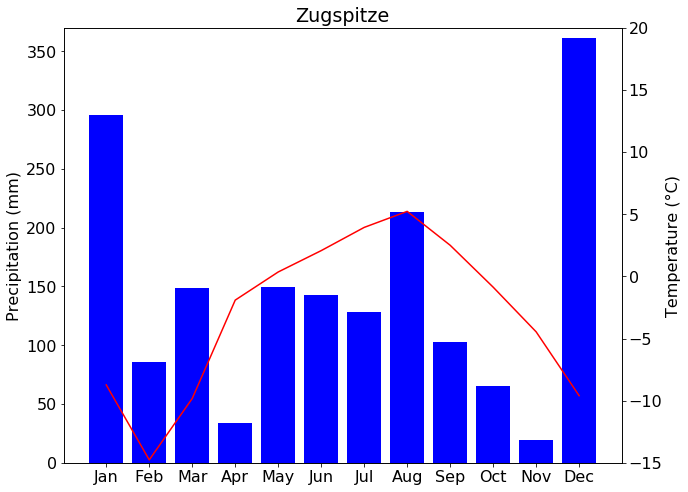

In [46]:
create_climate_diagram(garmisch_agg, " TMK", " RSK", "Garmisch", "output/garmisch.png")
create_climate_diagram(zugspitze_agg, " TMK", " RSK", "Zugspitze", "outpu/zugspitze.png")